In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [39]:
data = pd.read_csv('./Data/mapo.csv')
data.head()

len(data)/ 32

243.0

In [40]:
mapo=data[data['행정동_코드_명'] == '서교동']



### 서비스 업종별로의 분포 보기

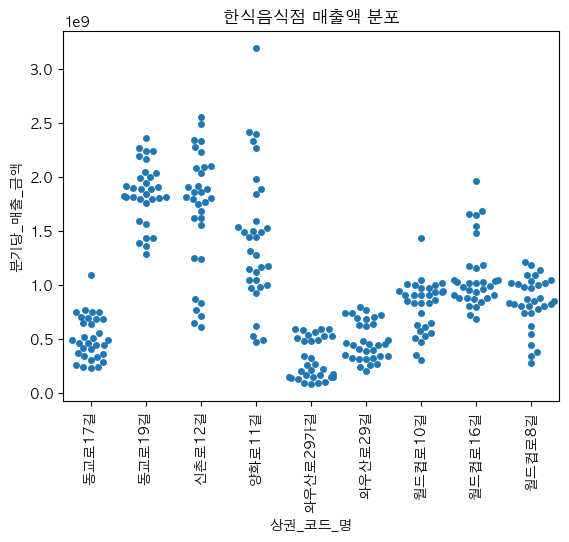

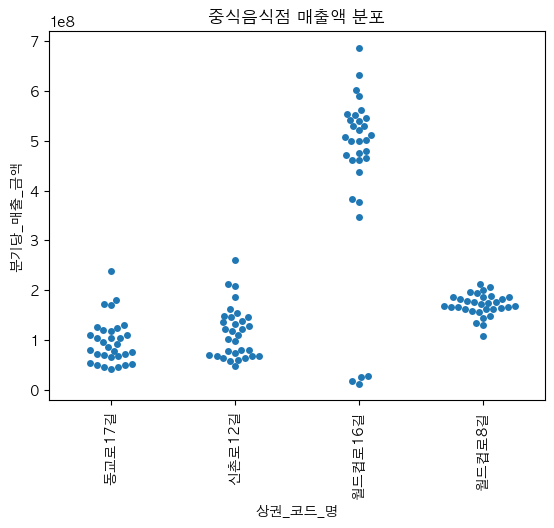

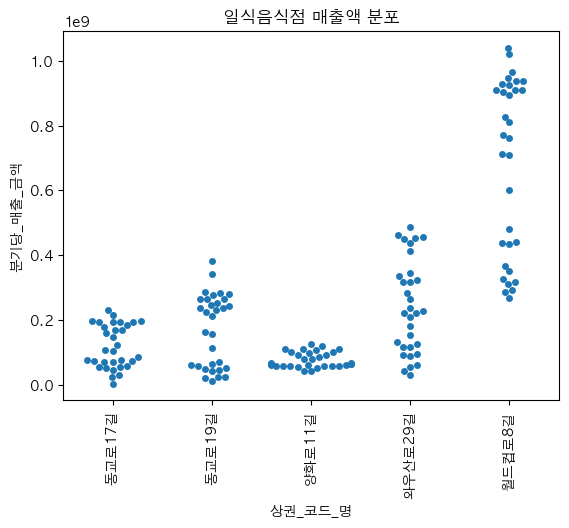

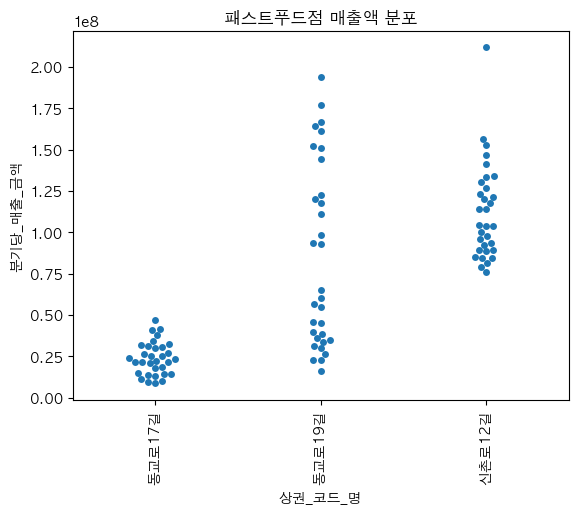

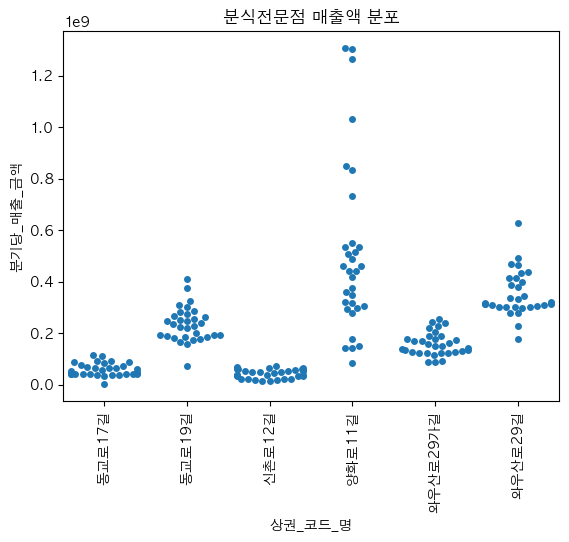

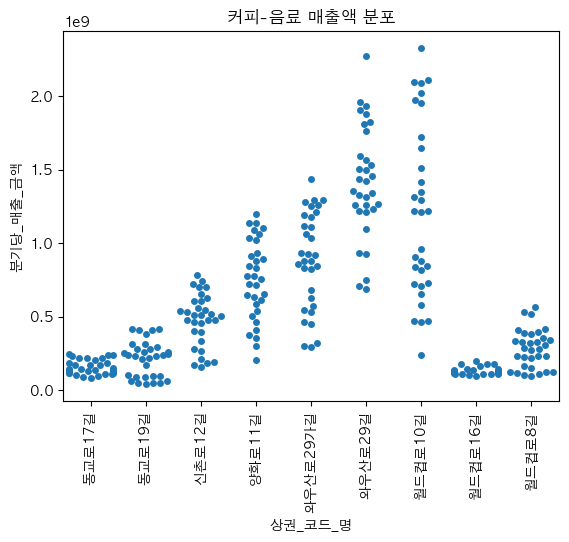

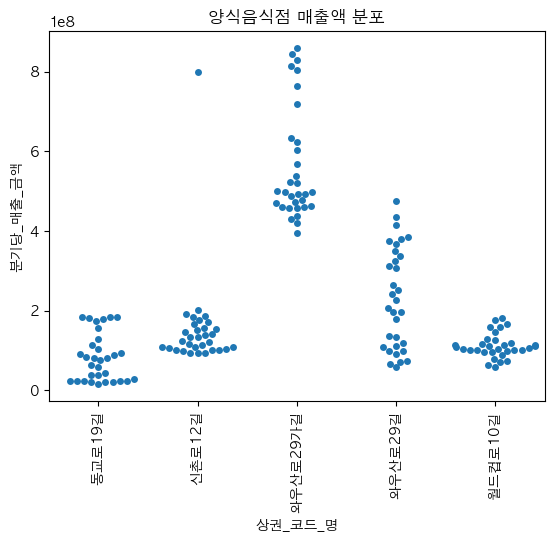

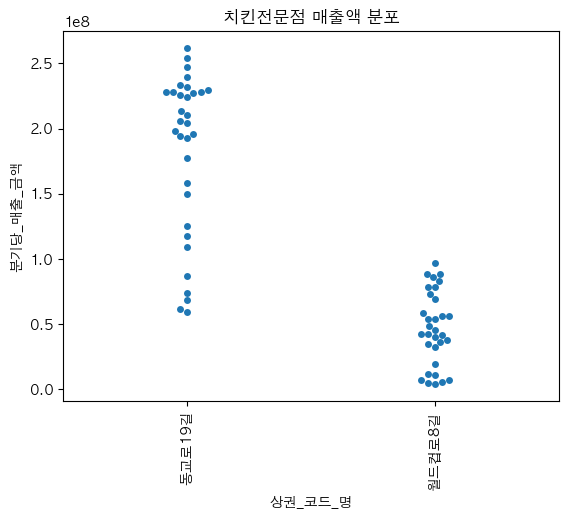

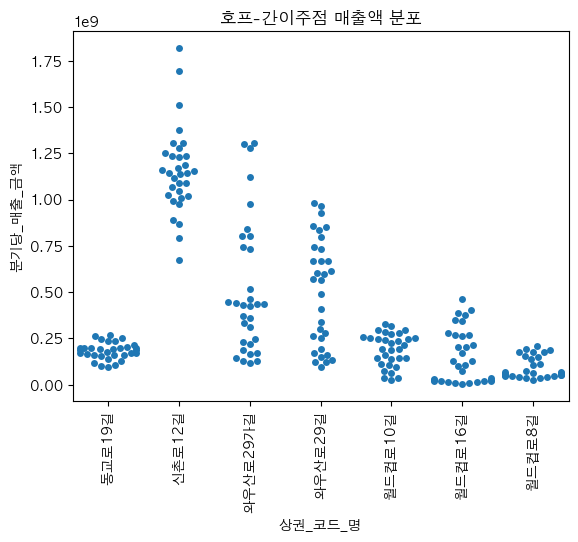

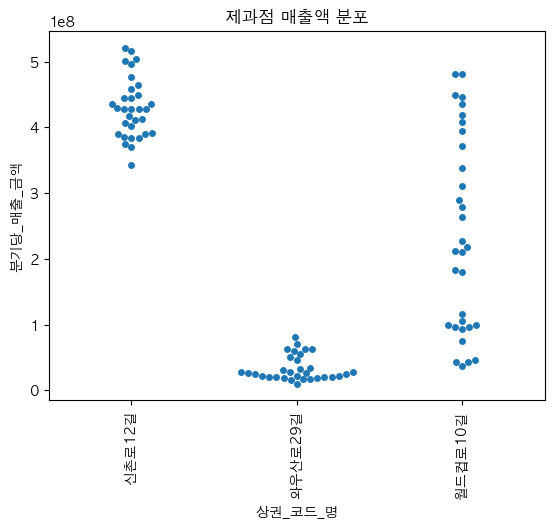

In [41]:
for service in mapo['서비스_업종_코드_명'].unique():
    test=mapo[mapo['서비스_업종_코드_명'] == service]
    test.reset_index(inplace=True)

    ax=sns.swarmplot(
        x='상권_코드_명',
        y='분기당_매출_금액',
        data=test
    )

    plt.title(f'{service} 매출액 분포')

    plt.xticks(
        rotation=90
    )

    plt.show()

### 추정치라 못믿겠어서 위아래 10%씩 자르고 해보기

In [42]:
from module.outlier import removeTen , thirtyTwo

gangnam_test=removeTen(mapo,'분기당_매출_금액',10)
gangnam_test=thirtyTwo(gangnam_test)


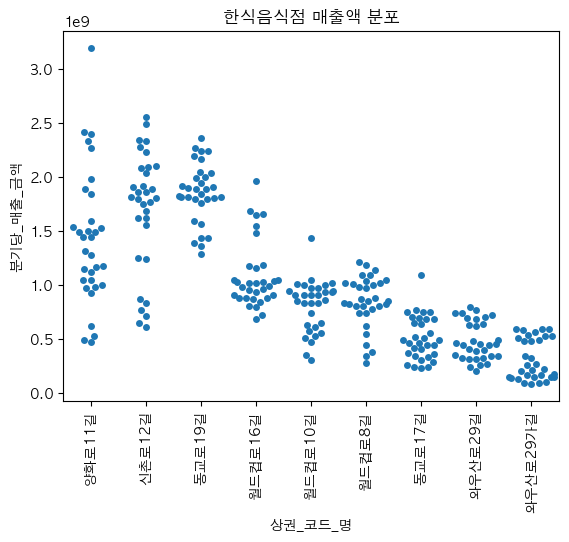

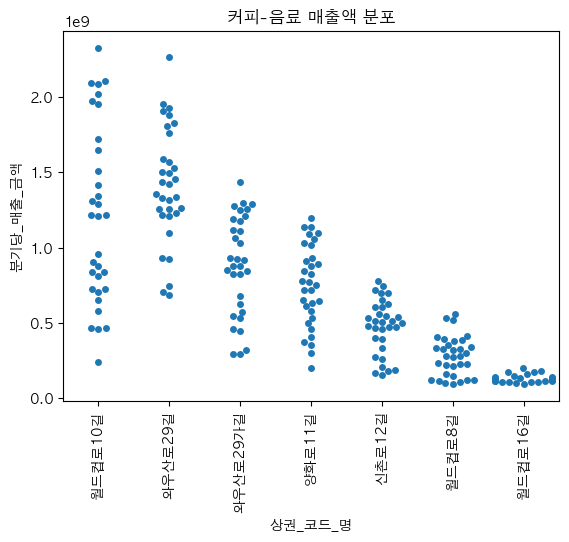

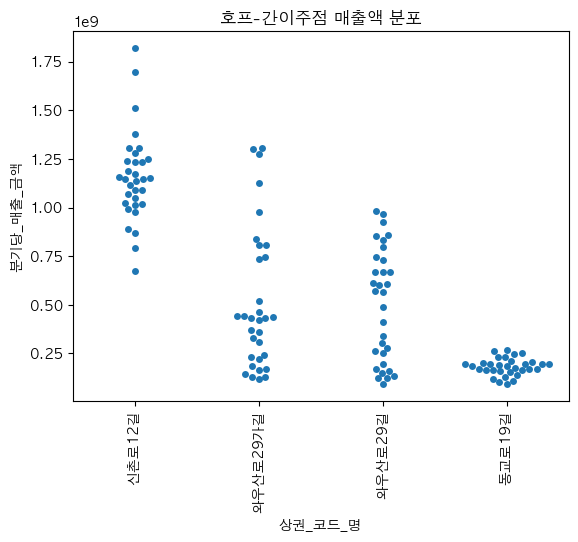

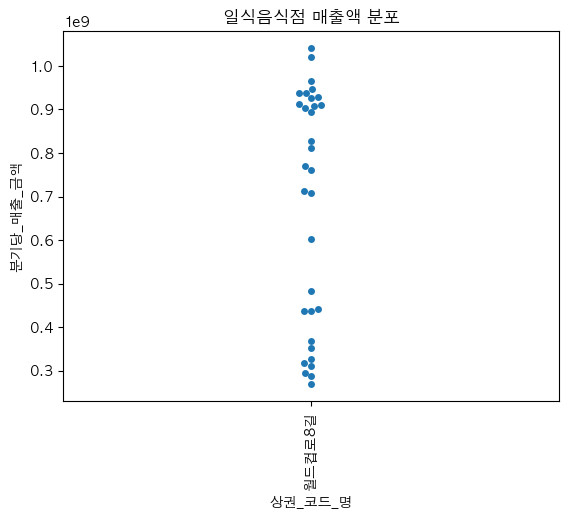

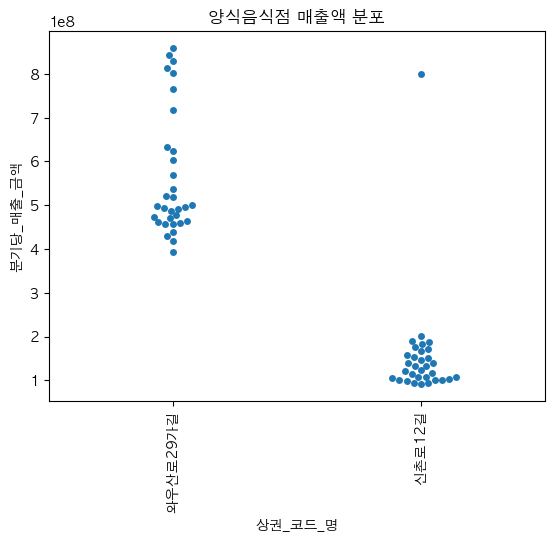

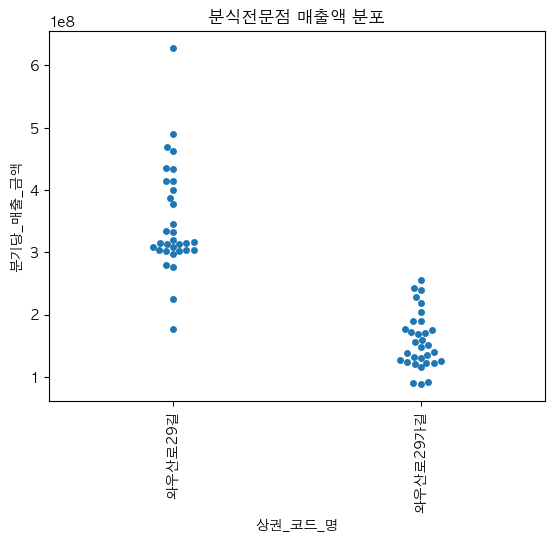

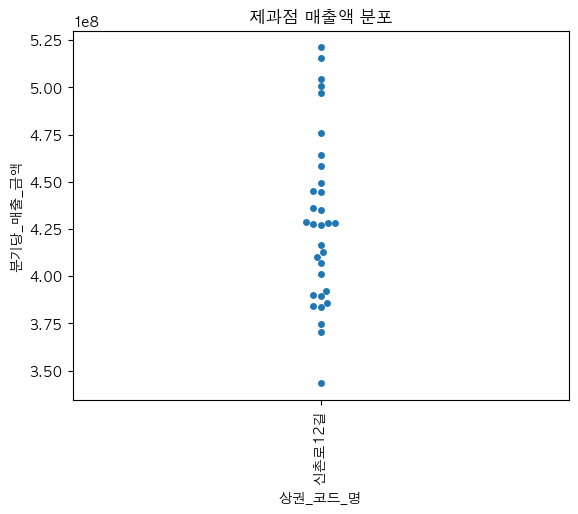

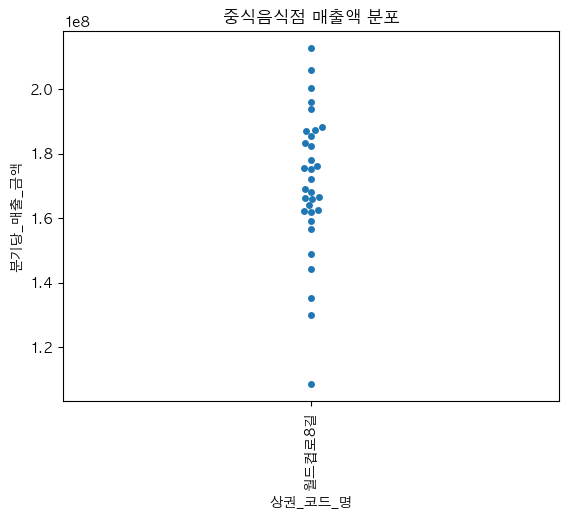

In [43]:
for service in gangnam_test['서비스_업종_코드_명'].unique():
    test=gangnam_test[gangnam_test['서비스_업종_코드_명'] == service]
    test.reset_index(inplace=True)

    ax=sns.swarmplot(
        x='상권_코드_명',
        y='분기당_매출_금액',
        data=test
    )

    plt.title(f'{service} 매출액 분포')

    plt.xticks(
        rotation=90
    )

    plt.show()

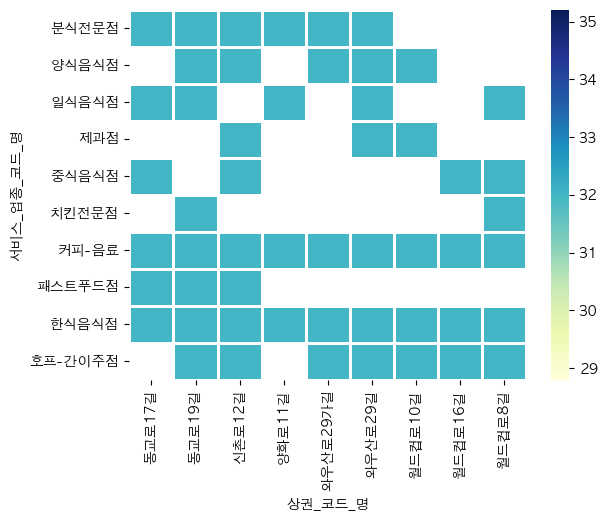

In [44]:
table=mapo.pivot_table(index=['상권_코드_명'],columns=['서비스_업종_코드_명'],aggfunc='size')
sns.heatmap(
	table.T,
	fmt='d',
	cmap='YlGnBu',
	linewidth=2,
	cbar=True
)

plt.show()

### 서교동 탕탕탕

### 전과 마찬가지로 동의 상권별로 나누었을 때, 분포가 다름을 알 수 있지만 분포가 상권별로 일정부분 고르기 때문에 더 이상 줄일 필요는 없고, 상권 코드를 feature column으로 사용하면 될 것 같다는 생각을 한다. 

### 또한 상권별로 데이터의 수도 고르기 때문에 더 이상 나눌 필요는 없고 서교동의 분기별 매출 예측을 이제 해보자.

In [45]:
mapo.to_csv('./Data/seogyodong.csv',index=False)